In [12]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

Function that does the discrete random walk on a graph

In [14]:
def random_walk_on_graph(graph, init_node, T):
    current_node = init_node
    for i in range(T):
        temp = list(graph.neighbors(current_node))
        if temp == []:
            break
        else:
            new_node = random.choice(temp)
            current_node = new_node
    return current_node



Function that finds the probability distribution on the columns of a graph of type G_n

In [15]:
#n_p is the number of shots done in order to get a probability distribution
def find_prob(n, T, n_p):
    n_columns = 2 * n + 1
    n_v = np.power(2, n + 1) + np.power(2, n) - 2
    vertexes = [i for i in range(n_v)]
    columns = []
    dict_col = {}
    for i in range(n_columns):
        columns.append([])
        dict_col[i] = []
    iterator = 0
    past_center_counter = 2
    for i in range(n_columns):
        if i <= n:
            n_v_c = np.power(2, i)
            for j in range(iterator, iterator + n_v_c):
                columns[i].append(j)
                dict_col[i].append(j)
            iterator = iterator + n_v_c
        elif i > n:
            k = i - past_center_counter
            past_center_counter = past_center_counter + 2
            n_v_c = np.power(2, k)

            for j in range(iterator, iterator + n_v_c):
                columns[i].append(j)
                dict_col[i].append(j)
            iterator = iterator + n_v_c

    g = nx.Graph()
    for i in range(len(columns)):
        g.add_nodes_from(columns[i])
    for i in range(len(columns)):
        if i < n:
            for j in range(len(columns[i])):
                g.add_edge(columns[i][j], columns[i + 1][2 * j])
                g.add_edge(columns[i][j], columns[i + 1][2 * j + 1])
        if i >= n and i != 2 * n:
            for j in range(len(columns[i + 1])):
                g.add_edge(columns[i + 1][j], columns[i][2 * j])
                g.add_edge(columns[i + 1][j], columns[i][2 * j + 1])

    results = []
    for t in range(n_p):
        results.append(random_walk_on_graph(g, 0, T))
    col_results = []
    for i in results:
        for j in dict_col.keys():
            for k in dict_col[j]:
                if i == k:
                    col_results.append(j)
                else:
                    pass
    return [col_results.count(2 * n) / (n_p), pow(2, -n)]

Function that does the graph

In [16]:
def do_graph(N, Time, N_part):
    obs = []
    scale = []
    x = []
    for i in range(N):
        x.append(i)
        fb = find_prob(i, Time, N_part)
        obs.append(fb[0])
        scale.append(fb[1])

    fig, ax = plt.subplots()
    ax.plot(x, obs, label="Observed probability", color="blue")
    ax.plot(x, scale, "k:", label="Predicted scaling", color="red")
    # ax.plot(Ns, theta, "k:", label="Expected", color="pink")
    legend = ax.legend(loc="upper center")
    legend.get_frame().set_facecolor("C0")
    # plt.plot(Ns, y)
    plt.grid(linestyle="--", linewidth=0.5)
    plt.xlabel("n")
    plt.ylabel("Probability")
    plt.show()
    

/var/folders/jk/jgkdl6hx493bhb_hd6fkl9q00000gn/T/ipykernel_74154/817178729.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, scale, "k:", label="Predicted scaling", color="red")


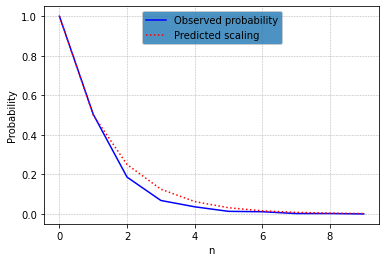

In [19]:

do_graph(10, 100, 1000)

